# **Heart Disease Diagnosis Analysis**

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset

In [2]:
heart_data=pd.read_csv("Heart Disease data.csv")
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Dataset Details
1. age
2. sex : 1= Male, 0= Female (Binary)
3. (cp)chest pain type (4 values -Ordinal):Value 1: typical angina ,Value 2: atypical angina, Value 3: non-anginal pain , Value 4: asymptomatic
4. (trestbps) resting blood pressure
5. (chol) serum cholesterol in mg/dl
6. (fbs)fasting blood sugar > 120 mg/dl(Binary)(1 = true; 0 = false)
7. (restecg) resting electrocardiography results(values 0,1,2)
8. (thalach) maximum heart rate achieved
9. (exang) exercise induced angina (binary) (1 = yes; 0 = no)
10. (oldpeak) = ST depression induced by exercise relative to rest
11. (slope) of the peak exercise ST segment (Ordinal) (Value 1: up sloping , Value 2: flat , Value 3: down sloping )
12. (ca) number of major vessels (0–3, Ordinal) colored by fluoroscopy
13. (thal): 0 = normal; 1 = fixed defect; 2 = reversable defect

## Data Observation

In [3]:
heart_dataset=heart_data.copy()

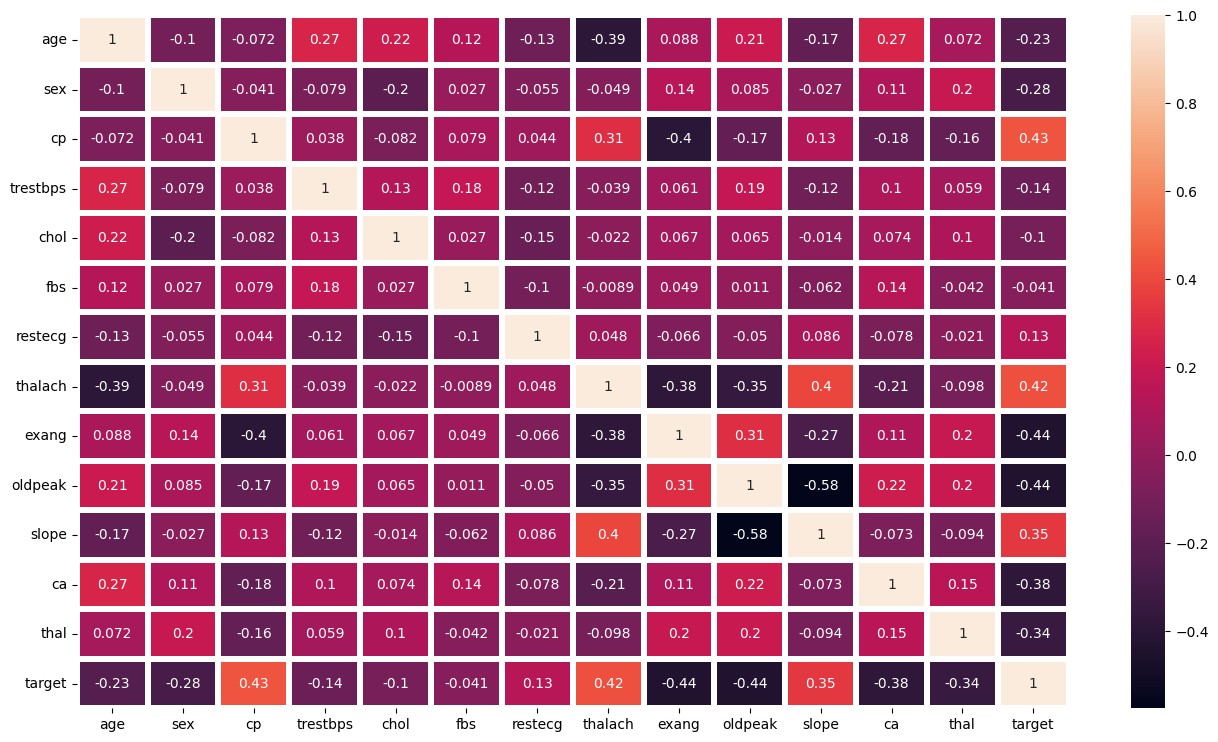

In [4]:
plt.figure(figsize=(16,9))
sns.heatmap(heart_dataset.corr(),annot=True,linewidths=3)
plt.show()

In [5]:
heart_data.shape

(1025, 14)

In [6]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
heart_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Data Preprocessing and Visualization

In [10]:
def heart_disease(value):
    if value==0:
        return 'Absent'
    else:
        return 'Present'

In [11]:
heart_data['heart_disease']=heart_data['target'].apply(heart_disease)

In [12]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absent
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absent
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absent
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absent
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absent


In [13]:
heart_data['heart_disease'].value_counts()

heart_disease
Present    526
Absent     499
Name: count, dtype: int64

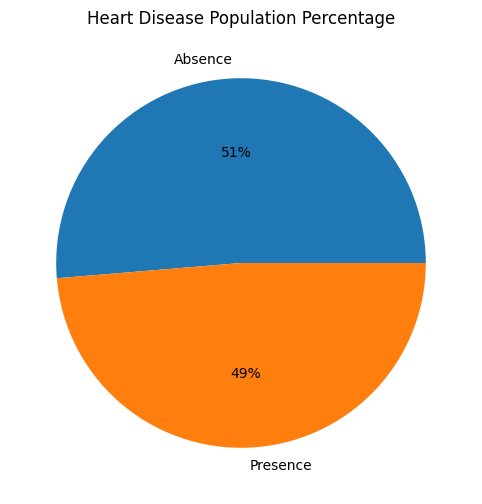

In [14]:
plt.figure(figsize=(8,6))
plt.pie(heart_data['heart_disease'].value_counts(),labels=['Absence','Presence'],autopct='%0.0f%%')
plt.title("Heart Disease Population Percentage")
plt.show()

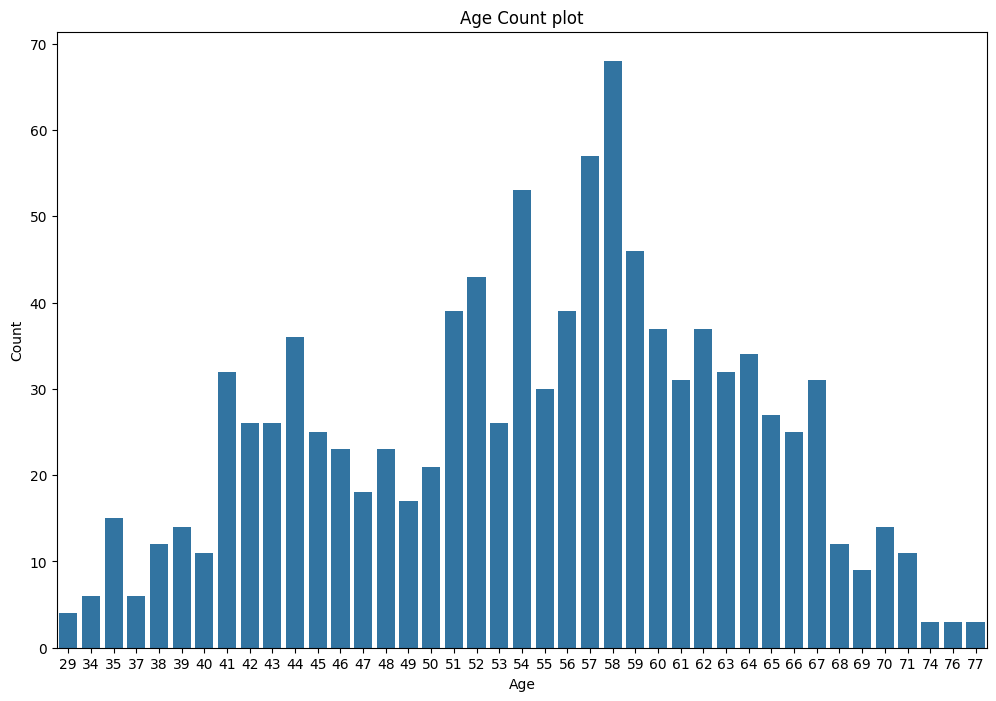

In [15]:
plt.figure(figsize=(12,8))
sns.countplot(x=heart_data.age,data=heart_data)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Count plot")
plt.show()

In [16]:
def gender(value):
    if value==1:
        return 'male'
    else:
        return 'female'

In [17]:
heart_data['gender']=heart_data.sex.apply(gender)

In [18]:
heart_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,heart_disease,gender
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absent,male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absent,male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absent,male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absent,male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absent,female
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,Present,female
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0,Absent,male
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0,Absent,male
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0,Absent,male
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0,Absent,male


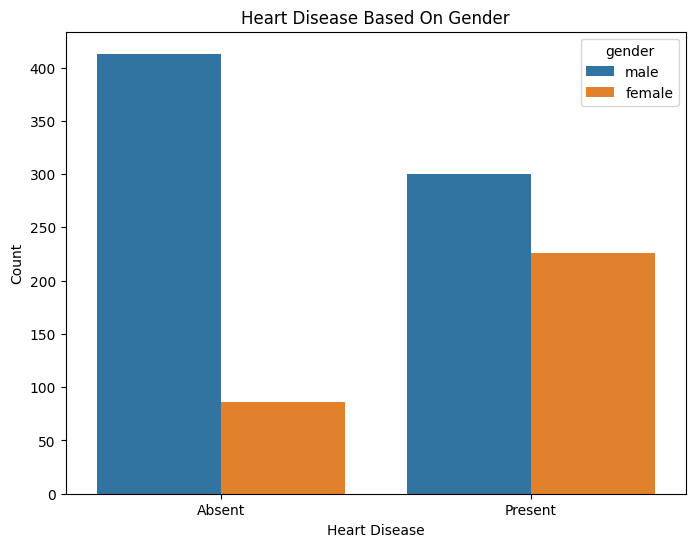

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(x=heart_data['heart_disease'],data=heart_data,hue=heart_data['gender'])
plt.title("Heart Disease Based On Gender")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()

In [20]:
def age_group(value):
    if value >=29 and value<=45:
        return 'younger_aged'
    elif value>=46 and value<=62:
        return 'middle_aged'
    else:
        return 'elder_aged'

In [21]:
heart_data['age_group']=heart_data.age.apply(age_group)

In [22]:
heart_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,heart_disease,gender,age_group
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absent,male,middle_aged
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absent,male,middle_aged
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absent,male,elder_aged
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absent,male,middle_aged
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absent,female,middle_aged
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,Present,female,middle_aged
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0,Absent,male,middle_aged
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0,Absent,male,middle_aged
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0,Absent,male,middle_aged
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0,Absent,male,middle_aged


In [23]:
heart_data['age_group'].value_counts()

age_group
middle_aged     608
younger_aged    213
elder_aged      204
Name: count, dtype: int64

In [24]:
y=len(heart_data[(heart_data['age']>=29) & (heart_data['age']<=45)])
m=len(heart_data[(heart_data['age']>=46) & (heart_data['age']<=62)])
e=len(heart_data[(heart_data['age']>=63)])
print(y,'\n',m,'\n',e,'\n')

213 
 608 
 204 



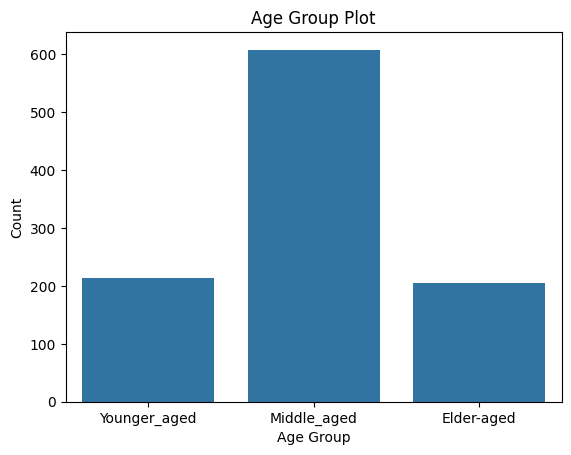

In [25]:
sns.barplot(x=['Younger_aged','Middle_aged','Elder-aged'],y=[y,m,e])
plt.title("Age Group Plot")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 26.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


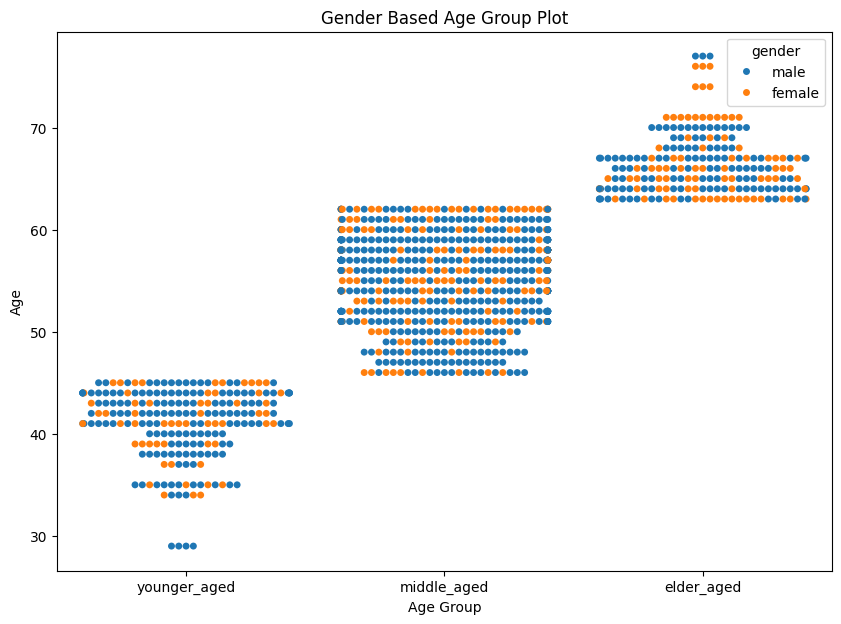

In [26]:
plt.figure(figsize=(10,7))
sns.swarmplot(x='age_group',y='age',hue='gender',data=heart_data,order=['younger_aged','middle_aged','elder_aged'])

plt.title("Gender Based Age Group Plot")
plt.xlabel("Age Group")
plt.ylabel("Age")
plt.show()

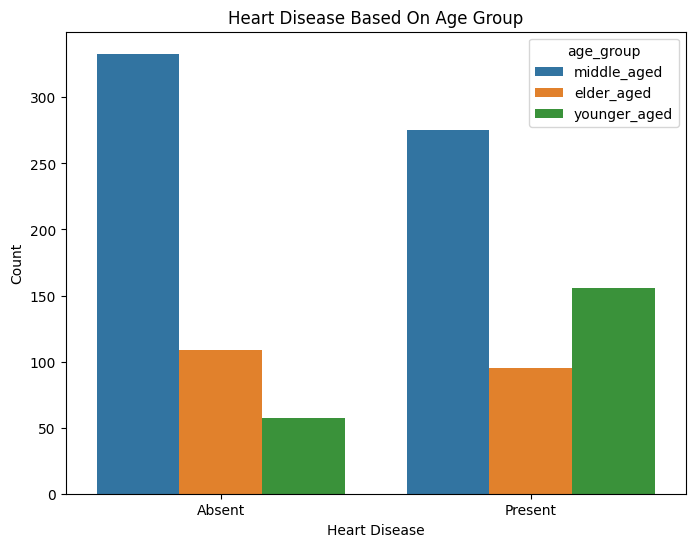

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(x=heart_data['heart_disease'],data=heart_data,hue=heart_data['age_group'])
plt.title("Heart Disease Based On Age Group")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()

In [28]:
#chest pain type (4 values -Ordinal):Value 0: typical angina ,Value 1: atypical angina, Value 2: non-anginal pain , Value 3: asymptomatic
def chest_pain(value):
    if value==0:
        return 'typical angina'
    elif value==1:
        return 'atypical angina'
    elif value==2:
        return 'non-anginal pain'
    else:
        return 'asymptomatic'

In [29]:
heart_data['chest_pain_type']=heart_data['cp'].apply(chest_pain)

In [30]:
heart_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,heart_disease,gender,age_group,chest_pain_type
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absent,male,middle_aged,typical angina
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absent,male,middle_aged,typical angina
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absent,male,elder_aged,typical angina
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absent,male,middle_aged,typical angina
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absent,female,middle_aged,typical angina
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,Present,female,middle_aged,typical angina
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0,Absent,male,middle_aged,typical angina
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0,Absent,male,middle_aged,typical angina
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0,Absent,male,middle_aged,typical angina
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0,Absent,male,middle_aged,typical angina


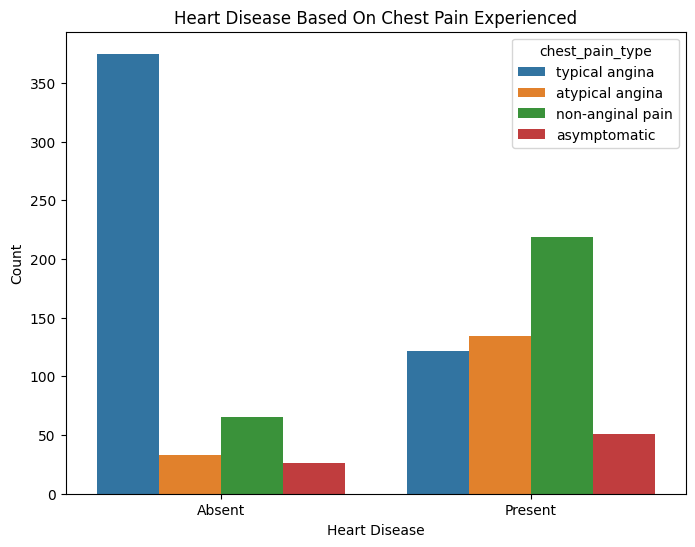

In [31]:
plt.figure(figsize=(8,6))
sns.countplot(x=heart_data['heart_disease'],data=heart_data,hue=heart_data['chest_pain_type'])
plt.title("Heart Disease Based On Chest Pain Experienced")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()

In [32]:
def fasting_blood_sugar(value):
    if value==0:
        return 'No'
    else:
        return 'Yes'

In [33]:
heart_data['blood_sugar']=heart_data['fbs'].apply(fasting_blood_sugar)

In [34]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,heart_disease,gender,age_group,chest_pain_type,blood_sugar
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absent,male,middle_aged,typical angina,No
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absent,male,middle_aged,typical angina,Yes
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absent,male,elder_aged,typical angina,No
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absent,male,middle_aged,typical angina,No
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absent,female,middle_aged,typical angina,Yes


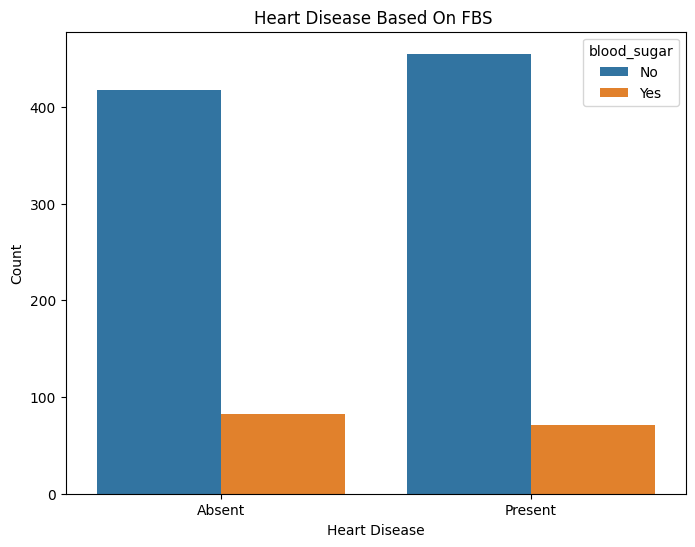

In [35]:
plt.figure(figsize=(8,6))
sns.countplot(x=heart_data['heart_disease'],data=heart_data,hue=heart_data['blood_sugar'])
plt.title("Heart Disease Based On FBS ")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()

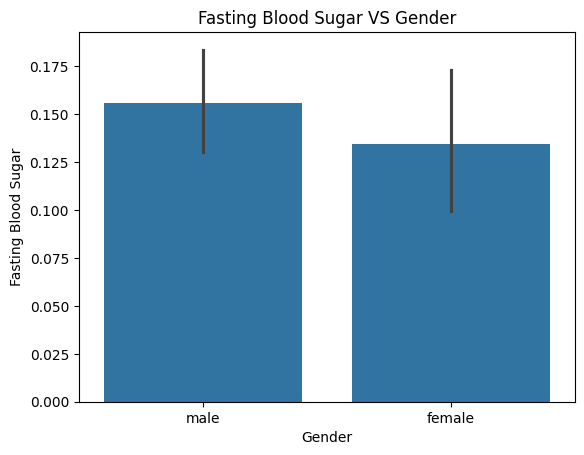

In [36]:
plt.figure()
sns.barplot(x=heart_data['gender'],y=heart_data['fbs'],data=heart_data)
plt.title("Fasting Blood Sugar VS Gender")
plt.xlabel("Gender")
plt.ylabel("Fasting Blood Sugar")
plt.show()

In [37]:
def cholesterol_levels(value):
    if value<=200:
        return 'low'
    elif value>=201 and value <=240:
        return 'medium'
    else:
        return 'high'

In [38]:
heart_data['cholesterol_level']=heart_data['chol'].apply(cholesterol_levels)

In [39]:
heart_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,heart_disease,gender,age_group,chest_pain_type,blood_sugar,cholesterol_level
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absent,male,middle_aged,typical angina,No,medium
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absent,male,middle_aged,typical angina,Yes,medium
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absent,male,elder_aged,typical angina,No,low
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absent,male,middle_aged,typical angina,No,medium
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absent,female,middle_aged,typical angina,Yes,high
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,Present,female,middle_aged,typical angina,No,high
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0,Absent,male,middle_aged,typical angina,No,high
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0,Absent,male,middle_aged,typical angina,No,high
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0,Absent,male,middle_aged,typical angina,No,high
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0,Absent,male,middle_aged,typical angina,No,high


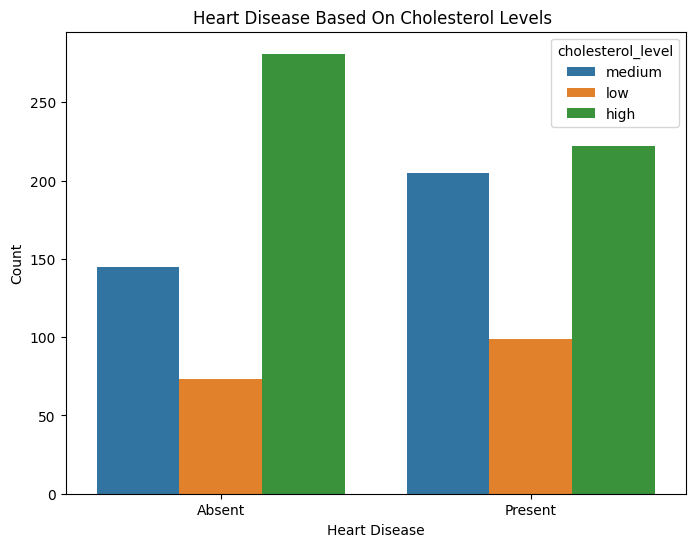

In [40]:
plt.figure(figsize=(8,6))
sns.countplot(x=heart_data['heart_disease'],data=heart_data,hue=heart_data['cholesterol_level'])
plt.title("Heart Disease Based On Cholesterol Levels ")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()

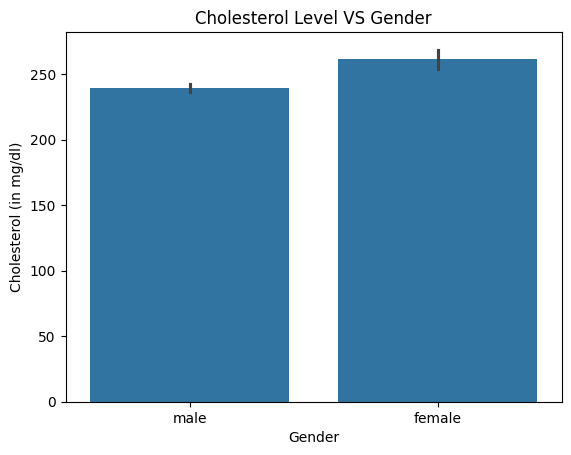

In [41]:
plt.figure()
sns.barplot(x=heart_data['gender'],y=heart_data['chol'],data=heart_data)
plt.title("Cholesterol Level VS Gender")
plt.xlabel("Gender")
plt.ylabel("Cholesterol (in mg/dl)")
plt.show()

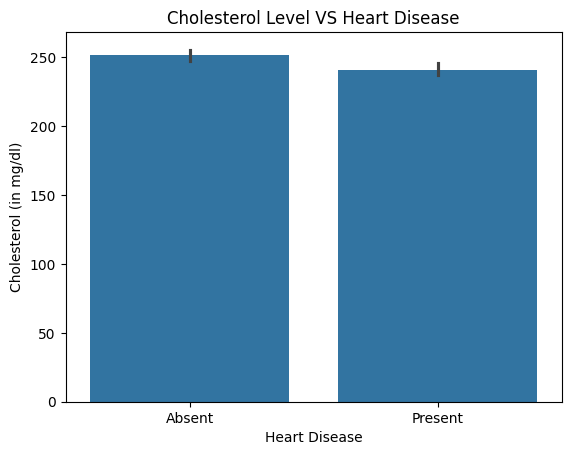

In [42]:
plt.figure()
sns.barplot(x=heart_data['heart_disease'],y=heart_data['chol'],data=heart_data)
plt.title("Cholesterol Level VS Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Cholesterol (in mg/dl)")
plt.show()

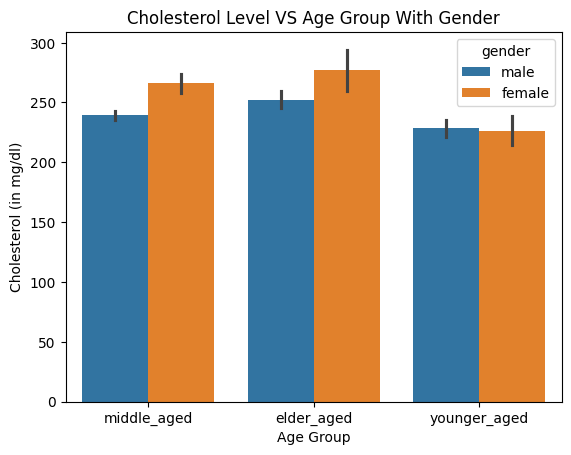

In [43]:
plt.figure()
sns.barplot(x=heart_data['age_group'],y=heart_data['chol'],data=heart_data,hue=heart_data['gender'])
plt.title("Cholesterol Level VS Age Group With Gender")
plt.xlabel("Age Group")
plt.ylabel("Cholesterol (in mg/dl)")
plt.show()

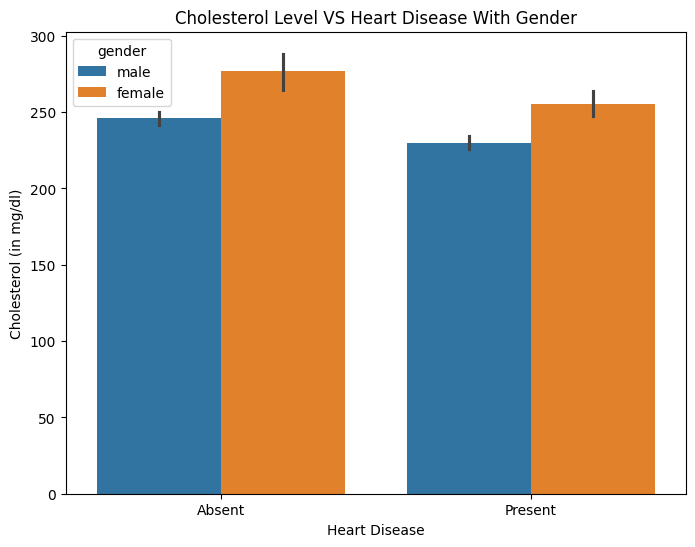

In [44]:
plt.figure(figsize=(8,6))
sns.barplot(x=heart_data['heart_disease'],y=heart_data['chol'],data=heart_data,hue=heart_data['gender'])
plt.title("Cholesterol Level VS Heart Disease With Gender")
plt.xlabel("Heart Disease")
plt.ylabel("Cholesterol (in mg/dl)")
plt.show()

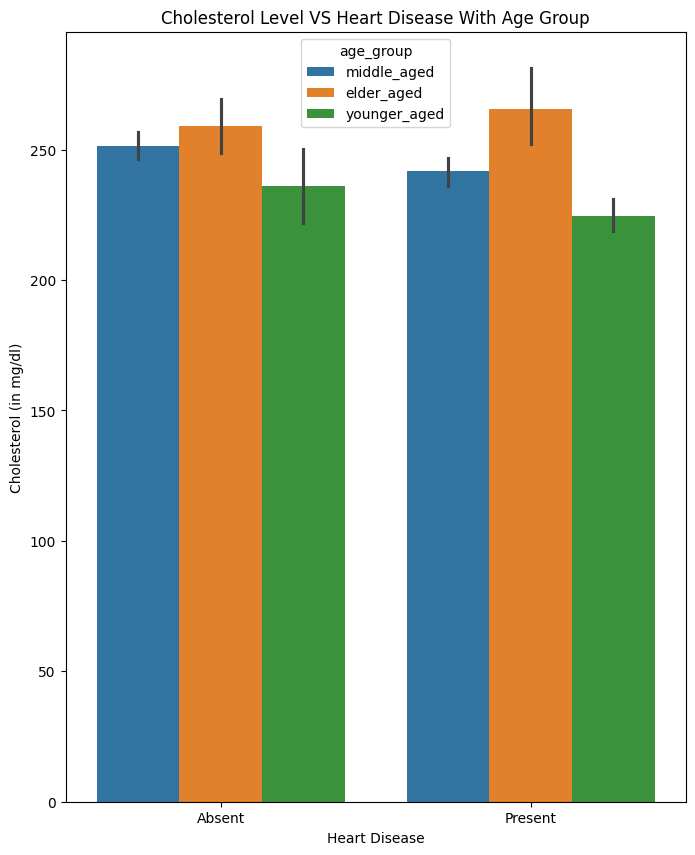

In [45]:
plt.figure(figsize=(8,10))
sns.barplot(x=heart_data['heart_disease'],y=heart_data['chol'],data=heart_data,hue=heart_data['age_group'])
plt.title("Cholesterol Level VS Heart Disease With Age Group")
plt.xlabel("Heart Disease")
plt.ylabel("Cholesterol (in mg/dl)")
plt.show()

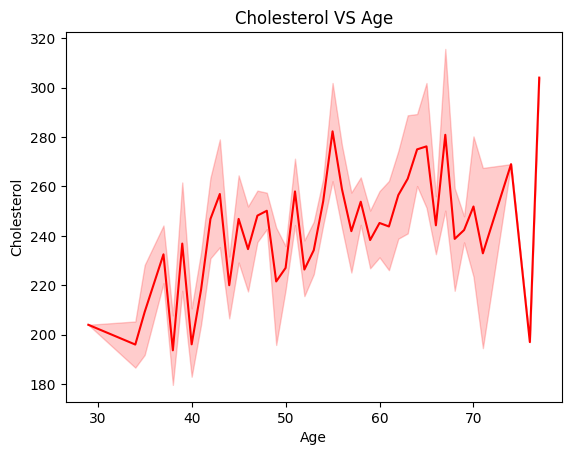

In [46]:
plt.figure()
sns.lineplot(x='age',y='chol',data=heart_data,color='Red')
plt.title("Cholesterol VS Age")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.show()

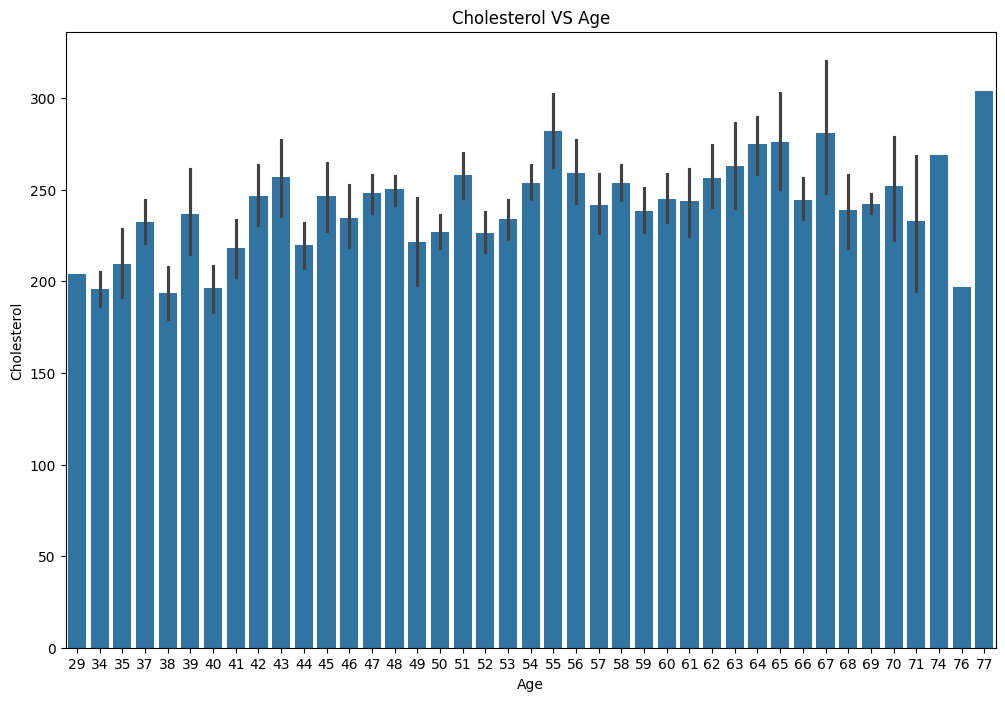

In [47]:
plt.figure(figsize=(12,8))
sns.barplot(x='age',y='chol',data=heart_data)
plt.title("Cholesterol VS Age")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.show()

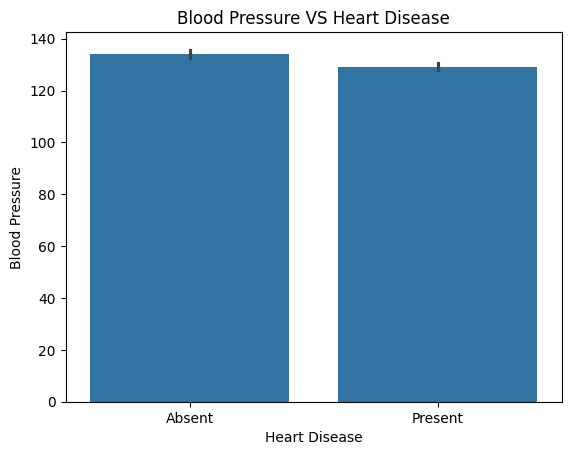

In [48]:
plt.figure()
sns.barplot(x=heart_data['heart_disease'],y=heart_data['trestbps'],data=heart_data)
plt.title("Blood Pressure VS Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Blood Pressure")
plt.show()

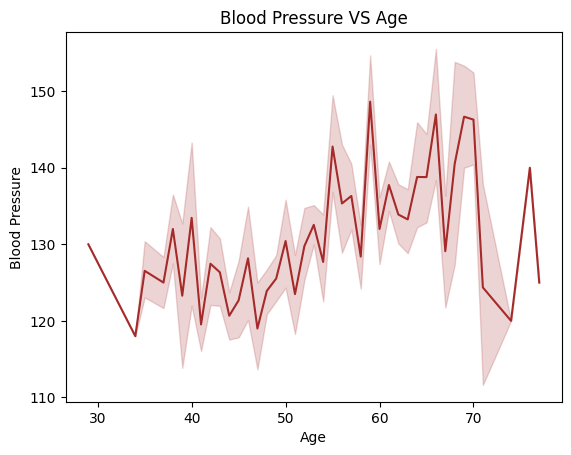

In [49]:
plt.figure()
sns.lineplot(x='age',y='trestbps',data=heart_data,color='Brown')
plt.title("Blood Pressure VS Age")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.show()

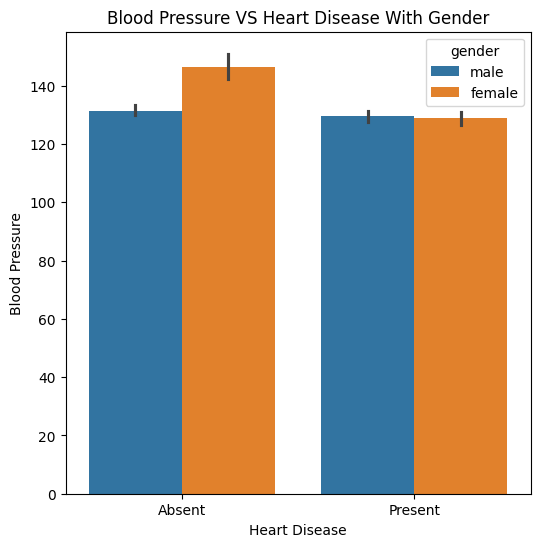

In [50]:
plt.figure(figsize=(6,6))
sns.barplot(x=heart_data['heart_disease'],y=heart_data['trestbps'],data=heart_data,hue=heart_data['gender'])
plt.title("Blood Pressure VS Heart Disease With Gender")
plt.xlabel("Heart Disease")
plt.ylabel("Blood Pressure")
plt.show()

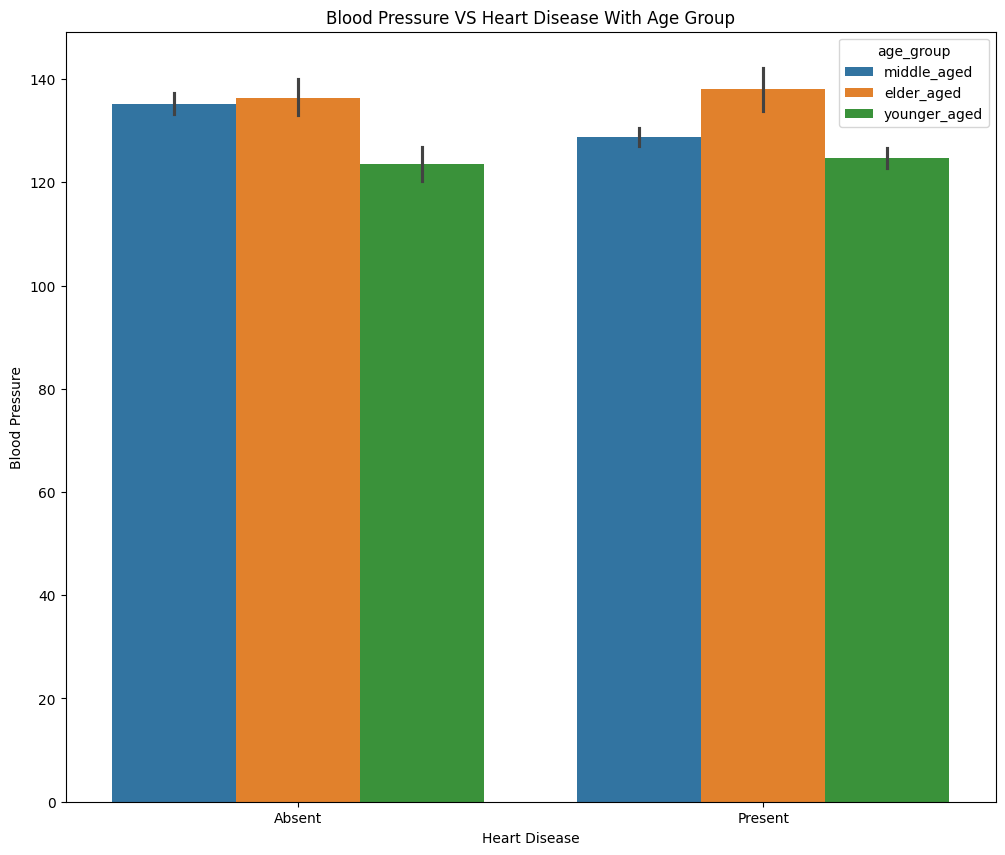

In [51]:
plt.figure(figsize=(12,10))
sns.barplot(x=heart_data['heart_disease'],y=heart_data['trestbps'],data=heart_data,hue=heart_data['age_group'])
plt.title("Blood Pressure VS Heart Disease With Age Group")
plt.xlabel("Heart Disease")
plt.ylabel("Blood Pressure")
plt.show()

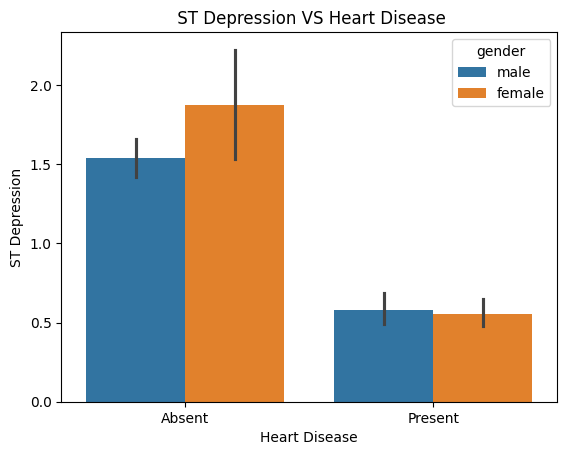

In [52]:
plt.figure()
sns.barplot(x=heart_data['heart_disease'],y=heart_data['oldpeak'],data=heart_data,hue=heart_data['gender'])
plt.title(" ST Depression VS Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("ST Depression")
plt.show()

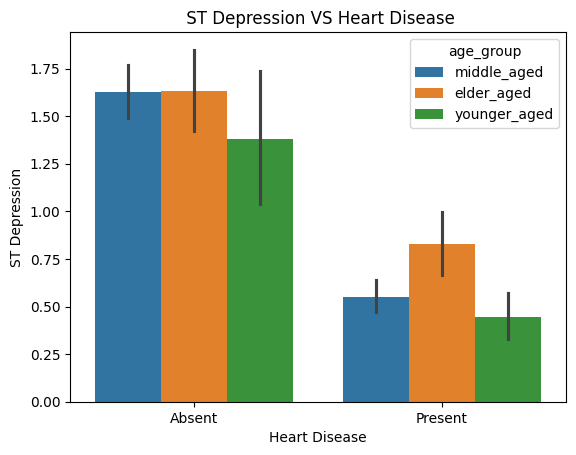

In [53]:
plt.figure()
sns.barplot(x=heart_data['heart_disease'],y=heart_data['oldpeak'],data=heart_data,hue=heart_data['age_group'])
plt.title(" ST Depression VS Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("ST Depression")
plt.show()

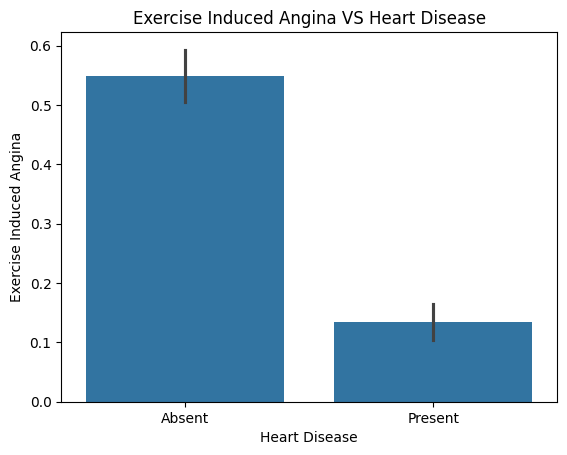

In [54]:
plt.figure()
sns.barplot(x=heart_data['heart_disease'],y=heart_data['exang'],data=heart_data)
plt.title("Exercise Induced Angina VS Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Exercise Induced Angina")
plt.show()

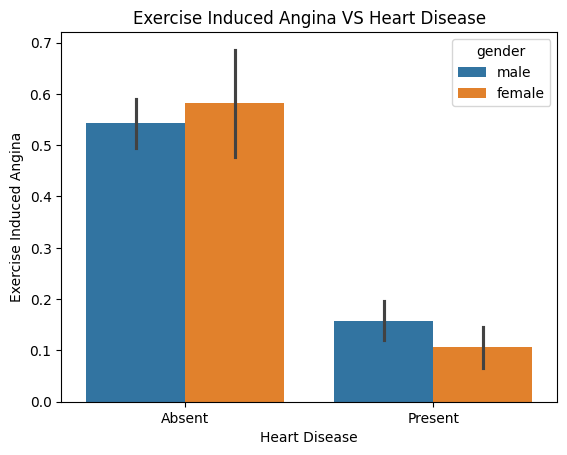

In [55]:
plt.figure()
sns.barplot(x=heart_data['heart_disease'],y=heart_data['exang'],data=heart_data,hue=heart_data['gender'])
plt.title("Exercise Induced Angina VS Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Exercise Induced Angina")
plt.show()

In [56]:
def exercise_induced_angina(value):
    if value==1:
        return 'Yes'
    else:
        return 'No'

In [57]:
heart_data['exe_with_angina']=heart_data.exang.apply(exercise_induced_angina)
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,ca,thal,target,heart_disease,gender,age_group,chest_pain_type,blood_sugar,cholesterol_level,exe_with_angina
0,52,1,0,125,212,0,1,168,0,1.0,...,2,3,0,Absent,male,middle_aged,typical angina,No,medium,No
1,53,1,0,140,203,1,0,155,1,3.1,...,0,3,0,Absent,male,middle_aged,typical angina,Yes,medium,Yes
2,70,1,0,145,174,0,1,125,1,2.6,...,0,3,0,Absent,male,elder_aged,typical angina,No,low,Yes
3,61,1,0,148,203,0,1,161,0,0.0,...,1,3,0,Absent,male,middle_aged,typical angina,No,medium,No
4,62,0,0,138,294,1,1,106,0,1.9,...,3,2,0,Absent,female,middle_aged,typical angina,Yes,high,No


In [58]:
heart_data.exe_with_angina.value_counts()

exe_with_angina
No     680
Yes    345
Name: count, dtype: int64

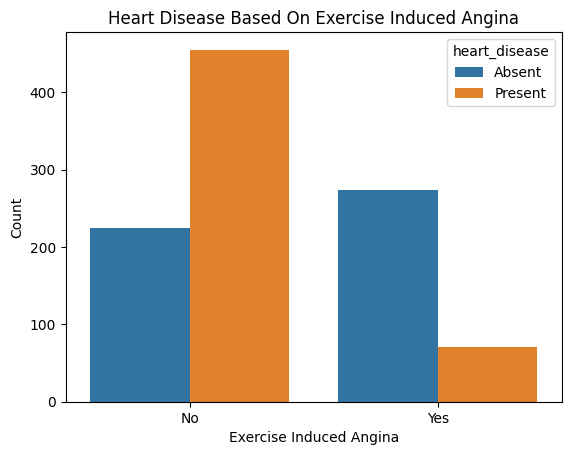

In [59]:
plt.figure()
sns.countplot(x=heart_data['exe_with_angina'],data=heart_data,hue=heart_data['heart_disease'])
plt.title("Heart Disease Based On Exercise Induced Angina")
plt.xlabel("Exercise Induced Angina")
plt.ylabel("Count")
plt.show()

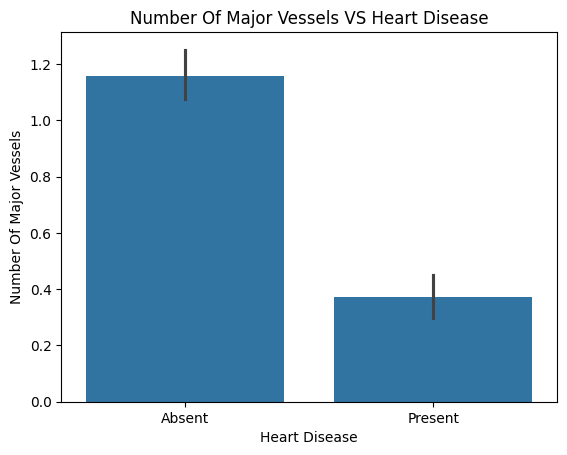

In [60]:
plt.figure()
sns.barplot(x=heart_data['heart_disease'],y=heart_data['ca'],data=heart_data)
plt.title("Number Of Major Vessels VS Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Number Of Major Vessels")
plt.show()

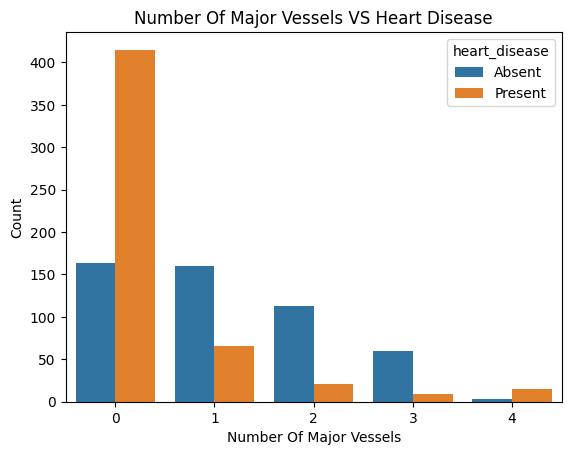

In [61]:
plt.figure()
sns.countplot(x=heart_data['ca'],data=heart_data,hue=heart_data['heart_disease'])
plt.title("Number Of Major Vessels VS Heart Disease")
plt.xlabel("Number Of Major Vessels")
plt.ylabel("Count")
plt.show()